In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(measurement.date, measurement.prcp).all()


[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 0.06),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.01),
 ('2010-01-12', 0.0),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.0),
 ('2010-01-21', 0.0),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.01),
 ('2010-01-25', 0.0),
 ('2010-01-26', 0.04),
 ('2010-01-27', 0.12),
 ('2010-01-28', 0.0),
 ('2010-01-30', None),
 ('2010-01-31', 0.03),
 ('2010-02-01', 0.01),
 ('2010-02-03', None),
 ('2010-02-04', 0.01),
 ('2010-02-05', 0.0),
 ('2010-02-06', 0.0),
 ('2010-02-07', 0.0),
 ('2010-02-08', 0.0),
 ('2010-02-09', 0.0),
 ('2010-02-11', 0.0),
 ('2010-02-12', 0.02),
 ('2010-02-13', 0.01),
 ('2010-02-14', 0.0),
 ('2010-02-15', 0.0),
 ('2010-02-16', 0.0),
 ('2010-02-17', 0.0),
 ('2010-02-19', None),
 ('2010-02-20', 0

In [11]:
# Calculate the date one year from the last date in data set.
yr_from_last = dt.date(2017,8,23) - dt.timedelta(days=365)
print(yr_from_last)



2016-08-23


In [12]:
# Perform a query to retrieve the data and precipitation scores
yr_pre_scores = session.query(measurement.date , measurement.prcp).\
    filter(measurement.date >= yr_from_last).order_by(measurement.date).all()
  
    
yr_pre_scores

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
results_df = pd.DataFrame(yr_pre_scores, columns = ['dates', 'precipitation'])
results_df = results_df.set_index('dates')





In [17]:
results_df

,precipitation
dates,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [14]:
# Sort the dataframe by date
results_df = results_df.sort_index(ascending = True)
results_df

,dates,precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


<AxesSubplot:title={'center':'Precipitation: 8/23/16 - 8/23/17'}>

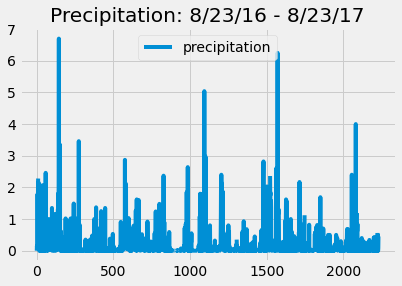

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
results_df.plot(title="Precipitation: 8/23/16 - 8/23/17")


In [162]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results_df.describe()

,1
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [164]:
# Design a query to calculate the total number stations in the dataset
station_number = session.query(station).count()
print(f'Station number count : {station_number}')

Station number count : 9


In [170]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
stationCounts = (session.query(measurement.station, func.count(measurement.station))
                        .group_by(measurement.station)
                        .order_by(func.count(measurement.station).desc())
                        .all())
stationCounts    

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [176]:
# List the stations and the counts in descending order.
stationCounts.sort(reverse=True)
stationCounts

[('USC00519523', 2669),
 ('USC00519397', 2724),
 ('USC00519281', 2772),
 ('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00513117', 2709),
 ('USC00511918', 1979)]

In [186]:
# Using the most active station id from the previous query
Sta_ID = stationCounts[0][0]

# (query) the lowest
lowestTemp = (session.query(measurement.tobs).filter(measurement.station == Sta_ID)
                    .order_by(measurement.tobs.asc())
                    .first())
lowestTemp = lowestTemp[0]
print(f'Lowest temp : {lowestTemp} degrees farenheit.')


# (query) highest
highestTemp = (session.query(measurement.tobs).filter(measurement.station == Sta_ID)
                     .order_by(measurement.tobs.desc())
                    .first()) 
                      
highestTemp = highestTemp[0]
print(f'Highest temp : {highestTemp} degrees farenheit.')

#(query) average temperature

avgTemp = (session.query(func.avg(measurement.tobs))
                  .filter(measurement.station == Sta_ID))
avgTemp = '{0:.3}'.format(avgTemp[0][0])

print(f'Average temp : {avgTemp} degrees farenheit.')

Lowest temp : 56.0 degrees farenheit.
Highest temp : 85.0 degrees farenheit.
Average temp : 74.5 degrees farenheit.


In [ ]:
# Using the most active station id


<AxesSubplot:ylabel='Frequency'>

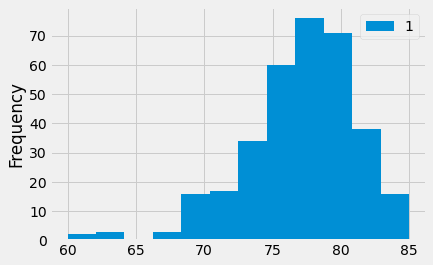

In [197]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_yr_data = (session.query(measurement.date, measurement.tobs).filter(measurement.date > yr_from_last)
                       .filter(measurement.station == Sta_ID).order_by(measurement.date)
                       .all())

Table = pd.DataFrame(last_yr_data)
# Table = Table.set_index('date')
Table = Table.sort_index(ascending=True)
    
Table.plot(kind='hist', bins=12)                   

# Close session

In [198]:
# Close Session
session.close()